In [1]:
import pandas as pd
from fullfrlm import flow_refueling_location_model
from get_abm_data import get_cs_data_batch, get_vessel_data_batch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [2]:
# for seed in seeds:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, \
    non_zero_flows, routes_supported, paths, G, df_abm, df_random_out, max_supported = flow_refueling_location_model(1, 10, 50000, 15000, 175, 40, 600, 2, 24, False, False, False)

Optimal


In [17]:
supported_routes = list(non_zero_flows.keys())

In [3]:
batch_data = pickle.load(open('ABM/own_work/data/batch_run_result.p', 'rb'))

In [5]:
df = pd.DataFrame(batch_data)

In [6]:
df

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
0,0,0,0,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...","('8863105', '8863755')",NaN,NaN,NaN,NaN,NaN
1,0,0,0,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...","('8863105', '8863891')",NaN,NaN,NaN,NaN,NaN
2,0,0,0,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...","('8863614', '8867395')",NaN,NaN,NaN,NaN,NaN
3,0,0,0,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...","('8866570', '8863048')",NaN,NaN,NaN,NaN,NaN
4,0,0,0,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...","('8866570', '8863131')",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34633,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",1976,NaN,NaN,NaN,NaN,NaN
34634,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",1977,NaN,NaN,NaN,NaN,NaN
34635,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",1979,NaN,NaN,NaN,NaN,NaN
34636,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",1980,NaN,NaN,NaN,NaN,NaN


In [4]:
df_cs = get_cs_data_batch(batch_data)

In [5]:
df_cs

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
253,0,0,11520,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...",8863614,0.023214,1.0,0.0,0.0,1.0
259,0,0,11520,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...",8868423,0.004563,1.0,0.0,0.0,1.0
262,0,0,11520,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...",8863818,0.161409,2.0,0.0,0.0,2.0
266,0,0,11520,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...",8862497,0.009425,1.0,0.0,0.0,1.0
267,0,0,11520,366463,"{'id': [0, 2, 1, 3, 6, 4, 8, 13, 7, 9, 5, 11, ...",8864566,0.026190,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
34617,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",8863709,0.019246,1.0,0.0,0.0,1.0
34619,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",22638327,0.012103,1.0,0.0,0.0,1.0
34623,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",8864111,0.088988,1.0,0.0,0.0,1.0
34628,99,0,11520,171826,"{'id': [1621, 1623, 1620, 1624, 1630, 1629, 16...",8863260,0.060119,1.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Average occupation charging stations')

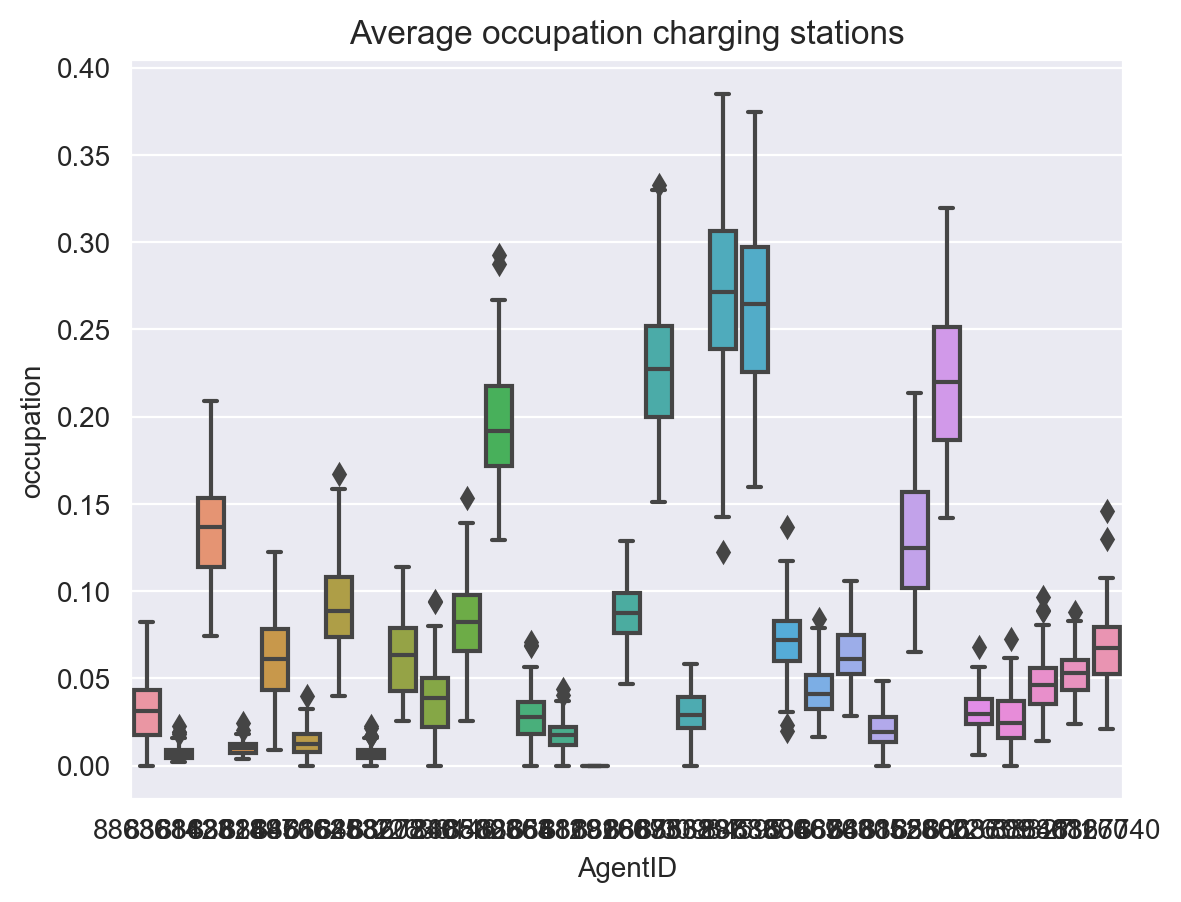

In [6]:
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='occupation', data=df_cs)
plt.title('Average occupation charging stations')

Text(0.5, 1.0, 'Average line length')

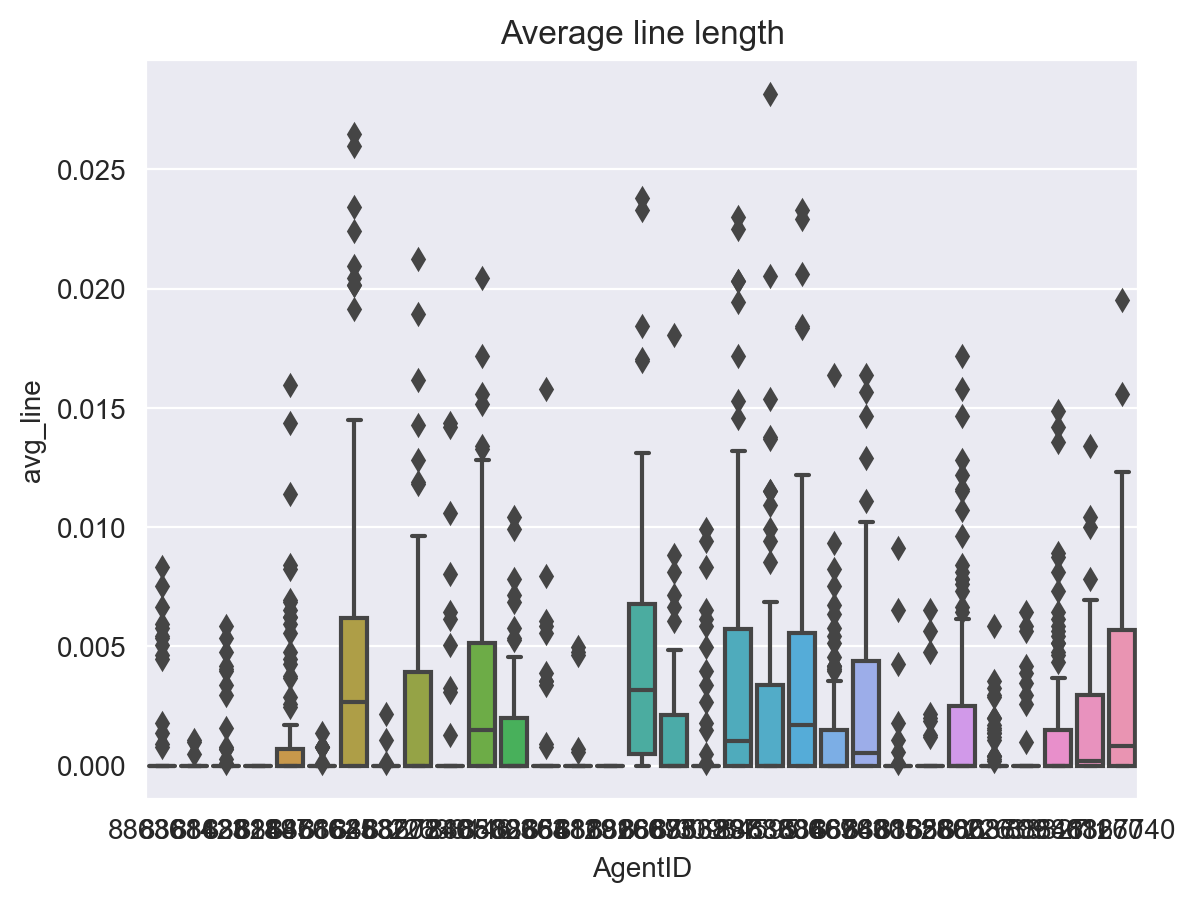

In [7]:
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='avg_line', data=df_cs)
plt.title('Average line length')

In [8]:
df_vessels = get_vessel_data_batch(batch_data)

Text(0.5, 1.0, 'Time in line')

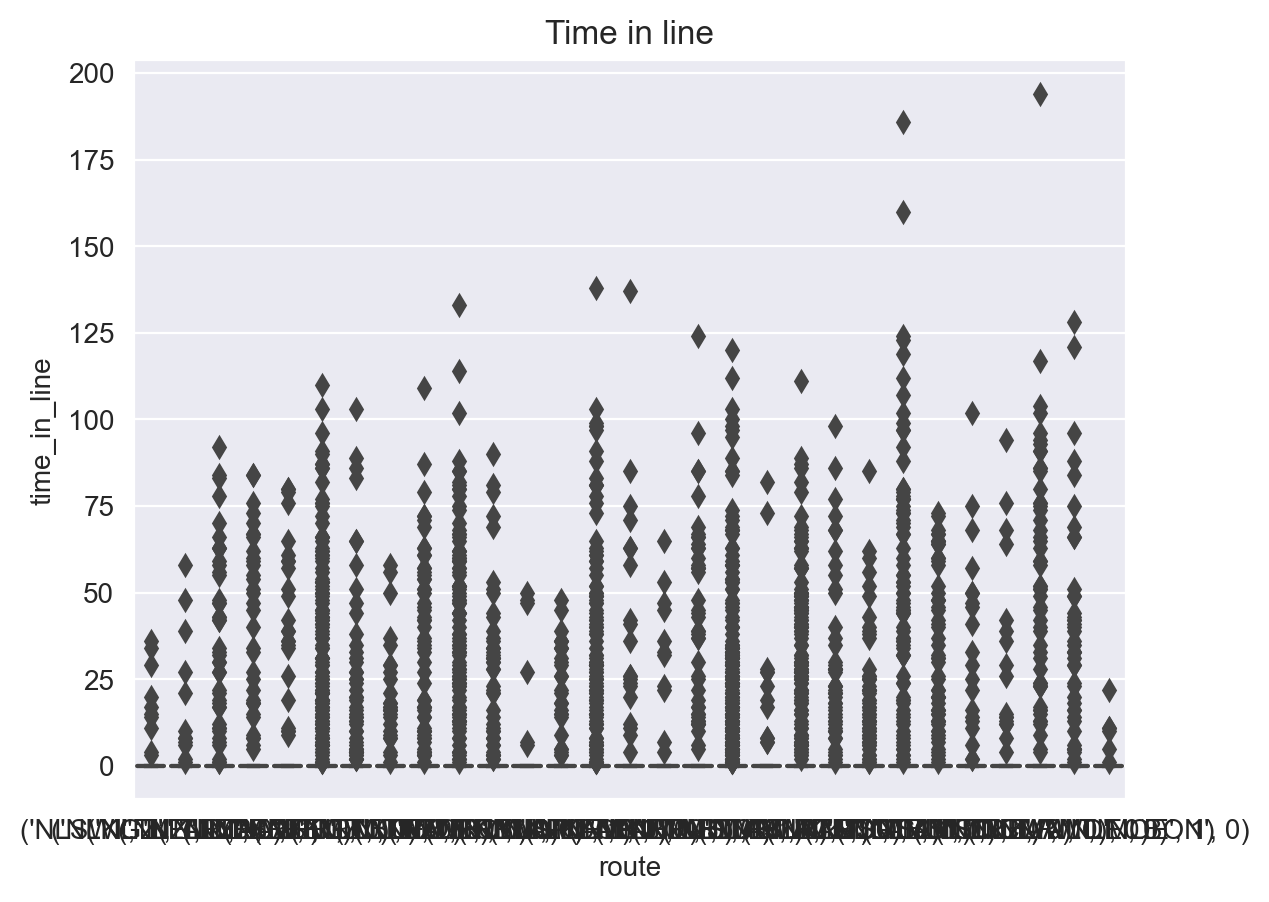

In [9]:
plt.subplots(dpi=200)
sns.boxplot(x='route', y='time_in_line', data=df_vessels)
plt.title('Time in line')

In [10]:
df_vessels

,id,route,combi,generation_hour,time_departed,travel_time,time_in_line,time_charging,battery_size
0,0,"(NLSWI, NLLEY, 0)",[8863709],9,33,99,0,0,1450
1,2,"(NLKGZ, NLZAA, 0)",[8863260],5,127,22,0,0,1000
2,1,"(NLTNZ, NLBRS, 0)","[8863469, 8861528]",20,118,121,0,70,4750
3,3,"(NLFAR, NLEEM, 0)","[8863614, 8866297]",5,175,155,0,89,4750
4,6,"(NLNIJ, NLDRU, 0)","[22638327, 8865412]",10,254,143,0,40,2300
...,...,...,...,...,...,...,...,...,...
352,1972,"(NLWSP, NLAER, 0)","[8864837, 8864005]",15,11147,183,0,51,2300
353,1978,"(NLKGZ, NLZAA, 0)",[8863260],7,11408,22,0,0,1450
354,1975,"(NLTNZ, NLVLI, 0)","[8863469, 8864111]",9,11263,110,0,63,4750
355,1970,"(NLRTM, NLMOE, 0)","[8862663, 8866686]",14,11122,189,0,132,4750


In [11]:
df_hourp = df_vessels.groupby('generation_hour').count()

In [12]:
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))

In [ ]:
#subset supported routes here before we take sum!
df_ivs.loc[df_ivs.origin.isin(routes_supported[0])]

In [13]:
df_ivs_group = df_ivs.groupby("hour").sum()

<AxesSubplot:xlabel='hour', ylabel='trip_count'>

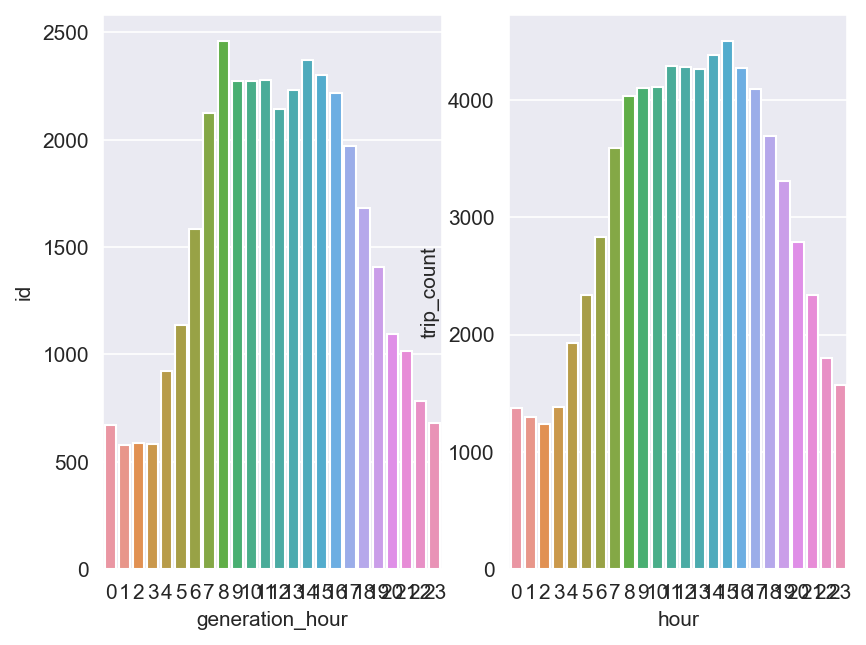

In [14]:
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
fig, ax = plt.subplots(1, 2, dpi=150)
sns.barplot(x=df_hourp.index, y=df_hourp.id, ax=ax[0])
sns.barplot(x=df_ivs_group.index, y=df_ivs_group.trip_count, ax=ax[1])

In [15]:
from scipy import stats
stats.ttest_rel(df_hourp.id, df_ivs_group.trip_count)

Ttest_relResult(statistic=-13.908172453853656, pvalue=1.102201937634525e-12)

In [33]:
df_ivs.groupby('hour').count()

In [10]:
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889


In [11]:
df_vessels

,id,route,combi,time_departed,travel_time,time_in_line,time_charging,battery_size
0,1,"(NLSWI, NLLEY, 0)",[8863709],16,99,0,67,3220
1,4,"(NLAMS, NLZAA, 0)",[8866763],112,30,0,48,3220
2,7,"(NLDOR, NLRTM, 1)",[8862663],239,130,0,0,9404
3,0,"(NLHAR, NLWTE, 0)","[8865756, 8865605]",13,206,0,167,9404
4,2,"(NLRTM, NLWLK, 1)","[8866893, 8863306]",63,361,0,46,2031
...,...,...,...,...,...,...,...,...
408,406,"(NLRTM, NLMOE, 0)",[8865003],11074,188,0,148,6650
409,407,"(NLUTC, NLTIE, 0)","[8867240, 22638146]",11114,195,0,112,6650
410,412,"(NLRTM, NLAPN, 0)",[8867538],11215,186,0,66,3220
411,409,"(NLRTM, NLMOE, 0)",[8865003],11134,188,0,148,6650


In [18]:
df_cs = get_cs_data_batch(batch_data)
df_cs

,occupation,max_occupation,avg_line,max_line,charging_stations
AgentID,,,,,
8868191,0.024715,1.000,0.000000,0.000,1.0
8866297,0.029725,1.000,0.000000,0.000,1.0
8863709,0.030419,1.000,0.000174,0.125,1.0
8865412,0.032713,1.000,0.000930,0.375,1.0
22638146,0.037636,1.000,0.000000,0.000,1.0
8864111,0.042597,1.000,0.002046,0.250,1.0
8864837,0.045734,1.000,0.000694,0.375,1.0
8868208,0.047321,1.000,0.001426,0.250,1.0
8867395,0.050062,1.000,0.000322,0.125,1.0


In [19]:

df_vessels = get_vessel_data_batch(batch_data)
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889
